In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

Считаем весь датасет:

In [2]:
df = pd.read_fwf('source/airportdat.txt', widths=[21, 22, 6, 7, 9, 10, 10], names=['Airport', 'City', 'Scheduled departures', 'Performed departures', 'Enplaned passengers', 'Enplaned revenue tons of freight', 'Enplaned revenue tons of mail'])

In [3]:
df

,Airport,City,Scheduled departures,Performed departures,Enplaned passengers,Enplaned revenue tons of freight,Enplaned revenue tons of mail
0,HARTSFIELD INTL,ATLANTA,285693,288803,22665665,165668.76,93039.48
1,BALTO/WASH INTL,BALTIMORE,73300,74048,4420425,18041.52,19722.93
2,LOGAN INTL,BOSTON,114153,115524,9549585,127815.09,29785.72
3,DOUGLAS MUNI,CHARLOTTE,120210,121798,7076954,36242.84,15399.46
4,OHARE INTL,CHICAGO,322430,332338,25636383,300463.80,140359.38
...,...,...,...,...,...,...,...
129,FOSS FIELD,SIOUX FALLS,6466,6514,226436,1163.97,1556.28
130,MICHIANA REGIONAL,SOUTH BEND,6630,7072,224050,1826.00,212.82
131,SPOKANE INTL,SPOKANE,25315,25837,747329,7827.61,2283.69
132,TALLAHASSEE REGIONAL,TALLAHASSEE,9193,9306,381840,1492.52,699.40


Определим количество интервалов разбиения по формуле Стёрджеса: $$ 1 + \lfloor \log_2(n) \rfloor $$

In [4]:
num_bins = int(1 + np.floor(np.log2(df.shape[0])))
num_bins

8

In [5]:
var1 = pd.DataFrame({'Вариационный ряд': sorted(df['Scheduled departures'])})
var2 = pd.DataFrame({'Вариационный ряд': sorted(df['Performed departures'])})
var3 = pd.DataFrame({'Вариационный ряд': sorted(df['Enplaned passengers'])})
var4 = pd.DataFrame({'Вариационный ряд': sorted(df['Enplaned revenue tons of freight'])})
var5 = pd.DataFrame({'Вариационный ряд': sorted(df['Enplaned revenue tons of mail'])})

1. Переменная "Scheduled departures"
    1.1. Вариационный ряд

In [6]:
var1

,Вариационный ряд
0,1188
1,1286
2,1735
3,3952
4,4241
...,...
129,172007
130,213302
131,266737
132,285693


1.2. Числовые характеристики

In [7]:
var1_info = var1['Вариационный ряд'].describe()
var1_info['Выборочная мода'] = stats.mode(var1['Вариационный ряд'], axis=None, keepdims=True)[0][0]
var1_info['Выборочная дисперсия'] = np.format_float_scientific(np.var(var1['Вариационный ряд']))
var1_info['Исправленная выборочная дисперсия'] = np.format_float_scientific(np.var(var1['Вариационный ряд'], ddof=1))
var1_info['Выборочный коэффициент асимметрии'] = stats.skew(var1['Вариационный ряд'])
var1_info['Выборочный коэффициент эксцесса'] = stats.kurtosis(var1['Вариационный ряд'])
var1_info

count                                                 134.0
mean                                           45562.425373
std                                            56594.531485
min                                                  1188.0
25%                                                  9049.0
50%                                                 22864.5
75%                                                63643.75
max                                                322430.0
Выборочная мода                                      1188.0
Выборочная дисперсия                 3.1790384492742815e+09
Исправленная выборочная дисперсия     3.202940994005667e+09
Выборочный коэффициент асимметрии                  2.410716
Выборочный коэффициент эксцесса                      6.9365
Name: Вариационный ряд, dtype: object

Коэффициент асимметрии >0 => данные имеют правостороннюю асимметрию
Коэффициент эксцесса >0 => распределение "острее", чем нормальное

1.3. Гистограмма

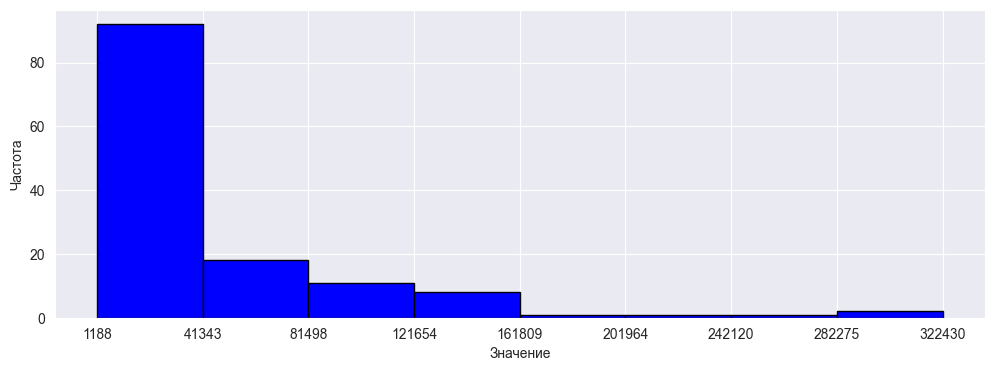

In [8]:
plt.figure(figsize=(12, 4))
plt.hist(var1['Вариационный ряд'], bins=num_bins, color='b', edgecolor='k')
plt.xlabel('Значение')
plt.ylabel('Частота')
bin_edges = np.linspace(var1_info['min'], var1_info['max'], num_bins + 1)
plt.xticks(bin_edges)
plt.show()

1.4. Ящик с усами

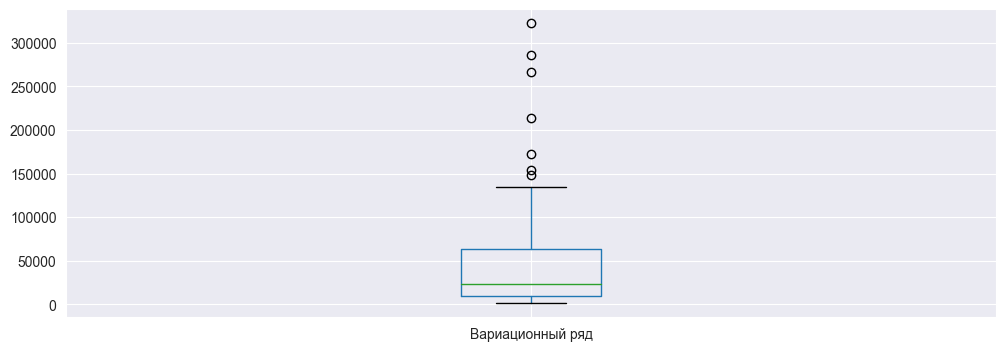

In [9]:
plt.figure(figsize=(12, 4))
var1.boxplot(column='Вариационный ряд')
plt.show()

1.5. Выдвижение гипотезы о распределении переменной

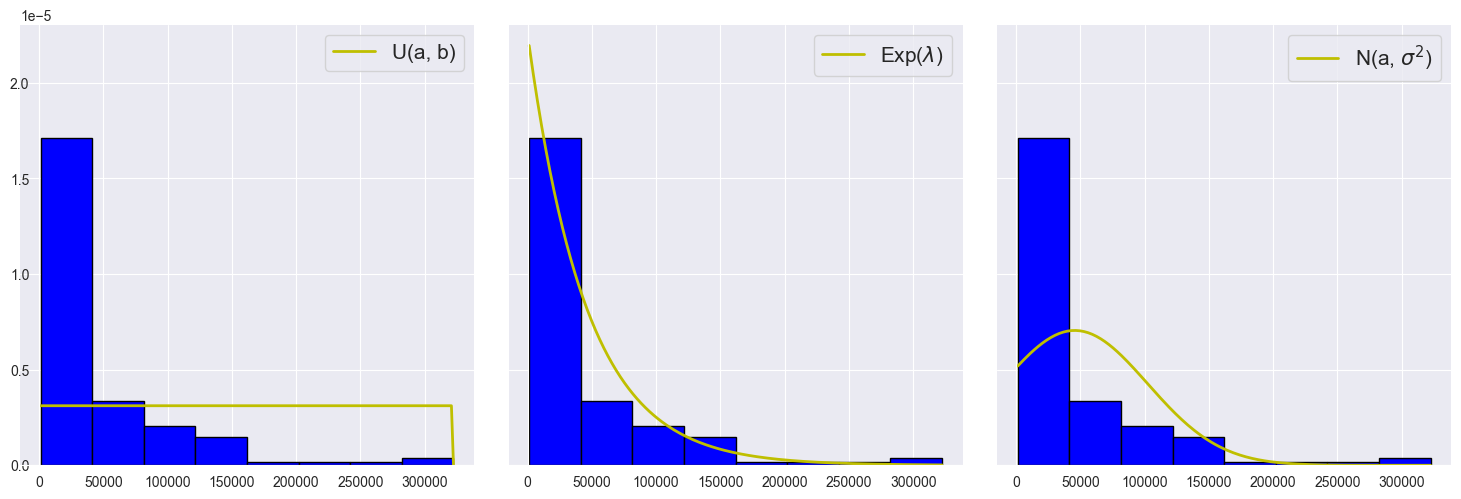

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
fig.tight_layout()
for i in range(3):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_position('zero')
    ax[i].spines['bottom'].set_position('zero')

l1 = var1['Вариационный ряд']
x = np.linspace(min(l1), max(l1) + 1, num=200)
y0 = stats.uniform.pdf(x, loc=min(l1), scale=max(l1)-min(l1))
y1 = stats.expon.pdf(x, loc=min(l1), scale=var1_info['mean'])
y2 = stats.norm.pdf(x, loc=var1_info['mean'], scale=var1_info['std'])


ax[0].hist(var1['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[0].plot(x, y0, linewidth=2, color='y', label='U(a, b)')
ax[0].legend(fontsize=15)

ax[1].hist(var1['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[1].plot(x, y1, linewidth=2, color='y', label=r'Exp($\lambda$)')
ax[1].legend(fontsize=15)

ax[2].hist(var1['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[2].plot(x, y2, linewidth=2, color='y', label=r'N(a, $\sigma^2$)')
ax[2].legend(fontsize=15)

plt.show()

Можно сделать предположение, что переменная имеет экспоненциальное распределение.

2. Переменная "Performed departures"
    2.1. Вариационный ряд

In [11]:
var2

,Вариационный ряд
0,1253
1,1334
2,1733
3,4024
4,4036
...,...
129,187581
130,215740
131,269665
132,288803


2.2. Числовые характеристики

In [12]:
var2_info = var2['Вариационный ряд'].describe()
var2_info['Выборочная мода'] = stats.mode(var2['Вариационный ряд'], axis=None, keepdims=True)[0][0]
var2_info['Выборочная дисперсия'] = np.format_float_scientific(np.var(var2['Вариационный ряд']))
var2_info['Исправленная выборочная дисперсия'] = np.format_float_scientific(np.var(var2['Вариационный ряд'], ddof=1))
var2_info['Выборочный коэффициент асимметрии'] = stats.skew(var2['Вариационный ряд'])
var2_info['Выборочный коэффициент эксцесса'] = stats.kurtosis(var2['Вариационный ряд'])
var2_info

count                                                 134.0
mean                                           46304.962687
std                                             57715.75669
min                                                  1253.0
25%                                                  9195.0
50%                                                 23027.5
75%                                                64196.75
max                                                332338.0
Выборочная мода                                      1253.0
Выборочная дисперсия                 3.3062495511254735e+09
Исправленная выборочная дисперсия     3.331108570306868e+09
Выборочный коэффициент асимметрии                  2.429586
Выборочный коэффициент эксцесса                    7.049333
Name: Вариационный ряд, dtype: object

Коэффициент асимметрии >0 => данные имеют правостороннюю асимметрию
Коэффициент эксцесса >0 => распределение "острее", чем нормальное

2.3. Гистограмма

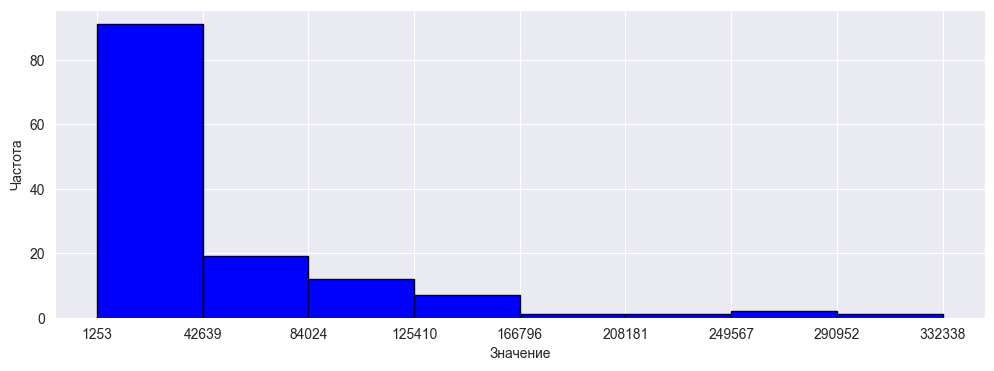

In [13]:
plt.figure(figsize=(12, 4))
plt.hist(var2['Вариационный ряд'], bins=num_bins, color='b', edgecolor='k')
plt.xlabel('Значение')
plt.ylabel('Частота')
bin_edges = np.linspace(var2_info['min'], var2_info['max'], num_bins + 1)
plt.xticks(bin_edges)
plt.show()

2.4. Ящик с усами

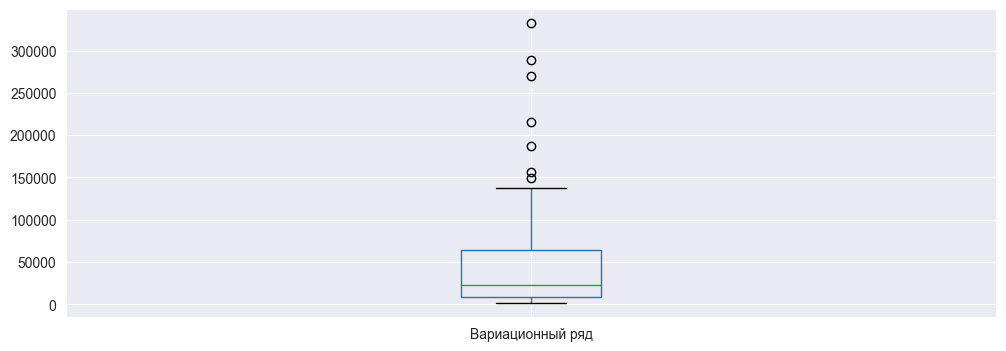

In [14]:
plt.figure(figsize=(12, 4))
var2.boxplot(column='Вариационный ряд')
plt.show()

2.5. Выдвижение гипотезы о распределении переменной

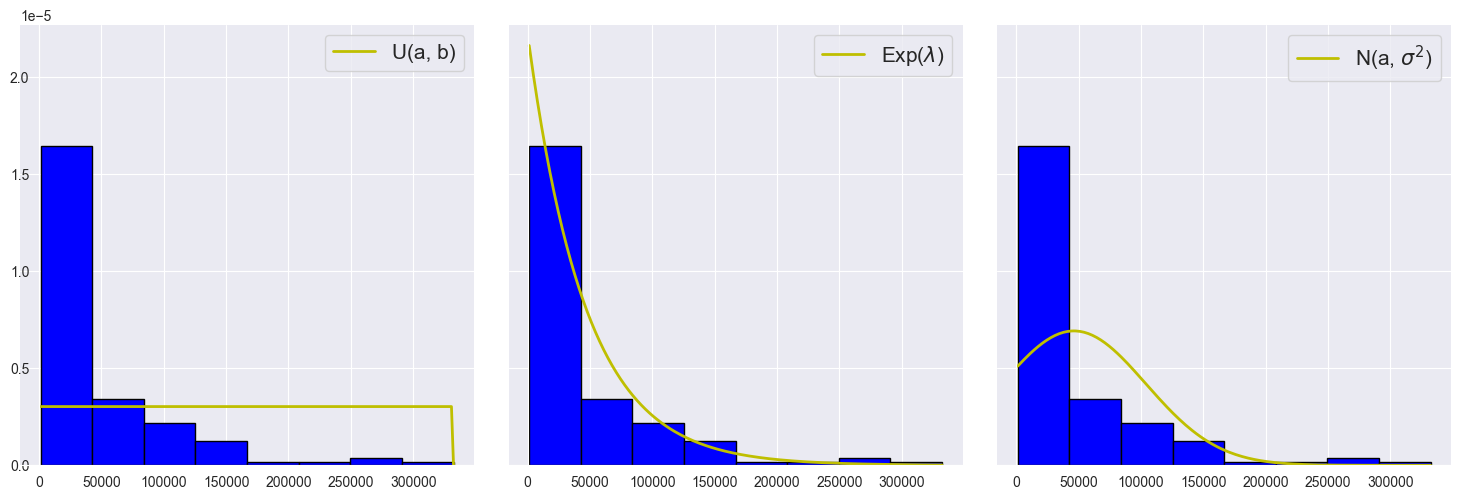

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
fig.tight_layout()
for i in range(3):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_position('zero')
    ax[i].spines['bottom'].set_position('zero')

l2 = var2['Вариационный ряд']
x = np.linspace(min(l2), max(l2) + 1, num=200)
y0 = stats.uniform.pdf(x, loc=min(l2), scale=max(l2)-min(l2))
y1 = stats.expon.pdf(x, loc=min(l2), scale=var2_info['mean'])
y2 = stats.norm.pdf(x, loc=var2_info['mean'], scale=var2_info['std'])


ax[0].hist(var2['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[0].plot(x, y0, linewidth=2, color='y', label='U(a, b)')
ax[0].legend(fontsize=15)

ax[1].hist(var2['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[1].plot(x, y1, linewidth=2, color='y', label=r'Exp($\lambda$)')
ax[1].legend(fontsize=15)

ax[2].hist(var2['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[2].plot(x, y2, linewidth=2, color='y', label=r'N(a, $\sigma^2$)')
ax[2].legend(fontsize=15)

plt.show()

Можно сделать предположение, что переменная имеет экспоненциальное распределение.

3. Переменная "Enplaned passengers"
    3.1. Вариационный ряд

In [16]:
var3

,Вариационный ряд
0,0
1,35
2,18967
3,49532
4,219310
...,...
129,13474929
130,18438056
131,22665665
132,22899267


3.2. Числовые характеристики

In [17]:
var3_info = var3['Вариационный ряд'].describe()
var3_info['Выборочная мода'] = stats.mode(var3['Вариационный ряд'], axis=None, keepdims=True)[0][0]
var3_info['Выборочная дисперсия'] = np.format_float_scientific(np.var(var3['Вариационный ряд']))
var3_info['Исправленная выборочная дисперсия'] = np.format_float_scientific(np.var(var3['Вариационный ряд'], ddof=1))
var3_info['Выборочный коэффициент асимметрии'] = stats.skew(var3['Вариационный ряд'])
var3_info['Выборочный коэффициент эксцесса'] = stats.kurtosis(var3['Вариационный ряд'])
var3_info

count                                                 134.0
mean                                         3136191.925373
std                                          4604641.599742
min                                                     0.0
25%                                               424246.75
50%                                               1210722.0
75%                                              3865530.25
max                                              25636383.0
Выборочная мода                                         0.0
Выборочная дисперсия                 2.1044494976535895e+13
Исправленная выборочная дисперсия    2.1202724262073758e+13
Выборочный коэффициент асимметрии                  2.638835
Выборочный коэффициент эксцесса                    7.995505
Name: Вариационный ряд, dtype: object

Коэффициент асимметрии >0 => данные имеют правостороннюю асимметрию
Коэффициент эксцесса >0 => распределение "острее", чем нормальное

3.3. Гистограмма

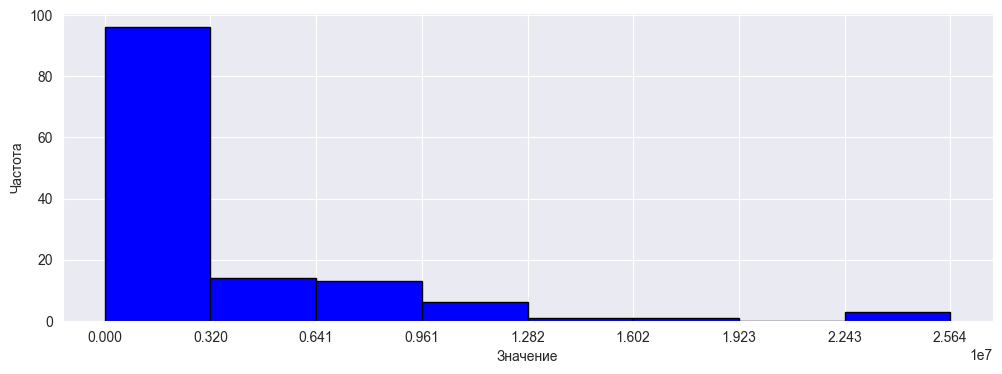

In [18]:
plt.figure(figsize=(12, 4))
plt.hist(var3['Вариационный ряд'], bins=num_bins, color='b', edgecolor='k')
plt.xlabel('Значение')
plt.ylabel('Частота')
bin_edges = np.linspace(var3_info['min'], var3_info['max'], num_bins + 1)
plt.xticks(bin_edges)
plt.show()

3.4. Ящик с усами

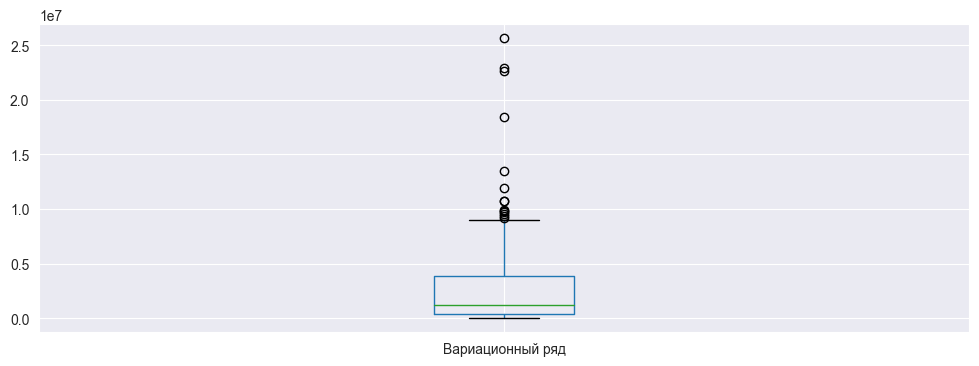

In [19]:
plt.figure(figsize=(12, 4))
var3.boxplot(column='Вариационный ряд')
plt.show()

3.5. Выдвижение гипотезы о распределении переменной

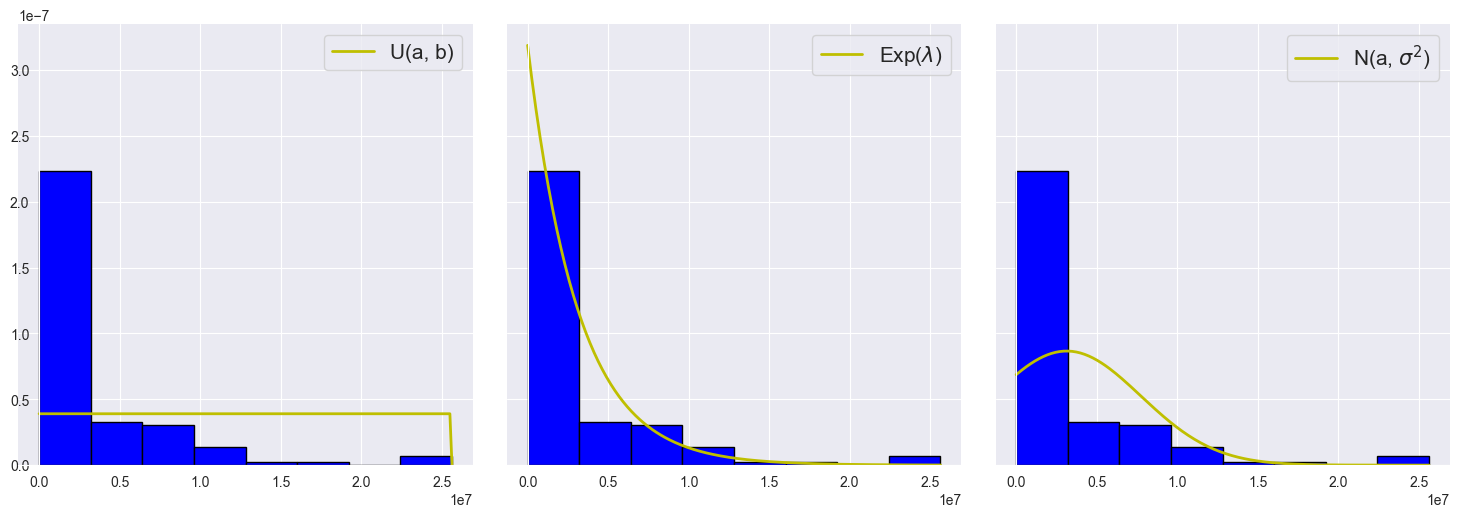

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
fig.tight_layout()
for i in range(3):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_position('zero')
    ax[i].spines['bottom'].set_position('zero')

l3 = var3['Вариационный ряд']
x = np.linspace(min(l3), max(l3) + 1, num=200)
y0 = stats.uniform.pdf(x, loc=min(l3), scale=max(l3)-min(l3))
y1 = stats.expon.pdf(x, loc=min(l3), scale=var3_info['mean'])
y2 = stats.norm.pdf(x, loc=var3_info['mean'], scale=var3_info['std'])


ax[0].hist(var3['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[0].plot(x, y0, linewidth=2, color='y', label='U(a, b)')
ax[0].legend(fontsize=15)

ax[1].hist(var3['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[1].plot(x, y1, linewidth=2, color='y', label=r'Exp($\lambda$)')
ax[1].legend(fontsize=15)

ax[2].hist(var3['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[2].plot(x, y2, linewidth=2, color='y', label=r'N(a, $\sigma^2$)')
ax[2].legend(fontsize=15)

plt.show()

Можно сделать предположение, что переменная имеет экспоненциальное распределение.

4. Переменная "Enplaned revenue tons of freight"
    4.1. Вариационный ряд

In [21]:
var4

,Вариационный ряд
0,7.95
1,133.58
2,151.42
3,199.45
4,257.83
...,...
129,275998.91
130,300463.80
131,318663.23
132,352823.50


4.2. Числовые характеристики

In [22]:
var4_info = var4['Вариационный ряд'].describe()
var4_info['Выборочная мода'] = stats.mode(var4['Вариационный ряд'], axis=None, keepdims=True)[0][0]
var4_info['Выборочная дисперсия'] = np.format_float_scientific(np.var(var4['Вариационный ряд']))
var4_info['Исправленная выборочная дисперсия'] = np.format_float_scientific(np.var(var4['Вариационный ряд'], ddof=1))
var4_info['Выборочный коэффициент асимметрии'] = stats.skew(var4['Вариационный ряд'])
var4_info['Выборочный коэффициент эксцесса'] = stats.kurtosis(var4['Вариационный ряд'])
var4_info

count                                                134.0
mean                                          33858.157687
std                                           81091.952306
min                                                   7.95
25%                                               1540.135
50%                                                6195.27
75%                                             20558.9225
max                                               614223.6
Выборочная мода                                       7.95
Выборочная дисперсия                 6.526830812913332e+09
Исправленная выборочная дисперсия    6.575904728799898e+09
Выборочный коэффициент асимметрии                 4.245278
Выборочный коэффициент эксцесса                  21.805484
Name: Вариационный ряд, dtype: object

Коэффициент асимметрии >0 => данные имеют правостороннюю асимметрию
Коэффициент эксцесса >0 => распределение "острее", чем нормальное

4.3. Гистограмма

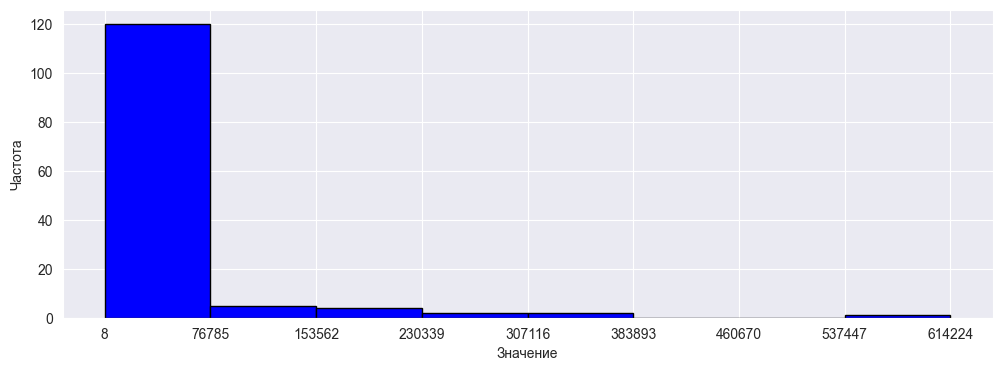

In [23]:
plt.figure(figsize=(12, 4))
plt.hist(var4['Вариационный ряд'], bins=num_bins, color='b', edgecolor='k')
plt.xlabel('Значение')
plt.ylabel('Частота')
bin_edges = np.linspace(var4_info['min'], var4_info['max'], num_bins + 1)
plt.xticks(bin_edges)
plt.show()

4.4. Ящик с усами

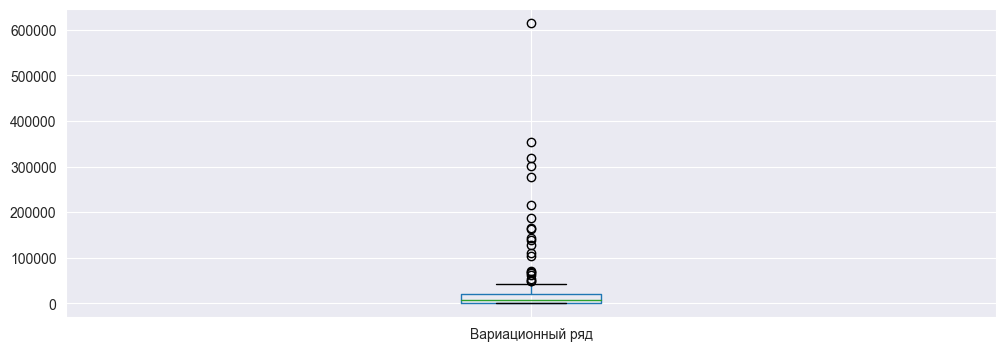

In [24]:
plt.figure(figsize=(12, 4))
var4.boxplot(column='Вариационный ряд')
plt.show()

4.5. Выдвижение гипотезы о распределении переменной

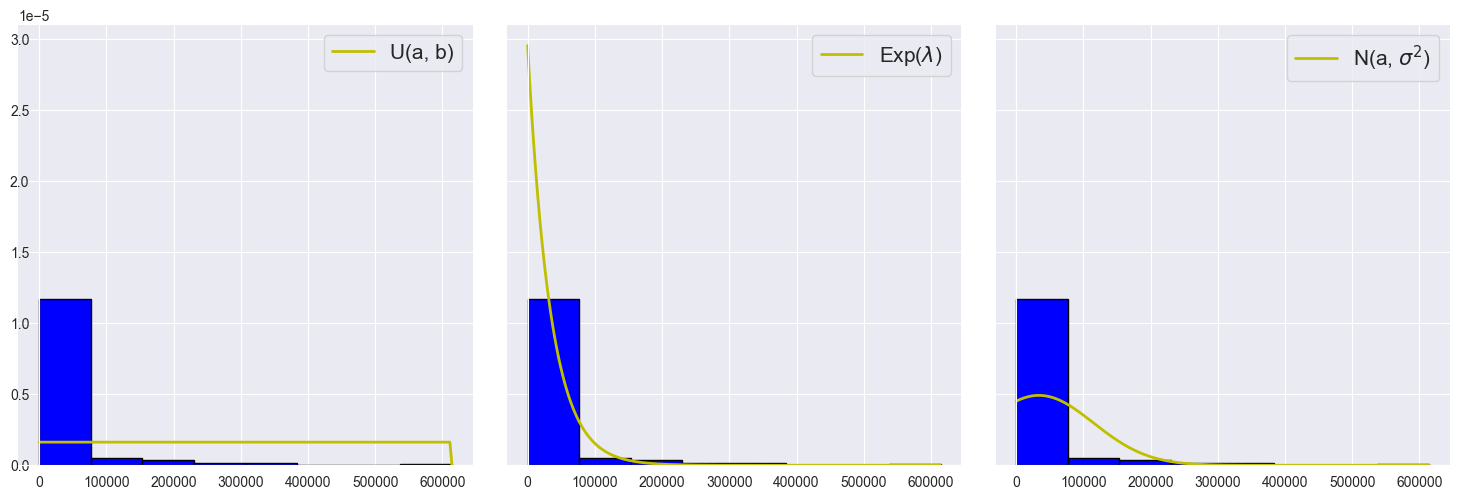

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
fig.tight_layout()
for i in range(3):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_position('zero')
    ax[i].spines['bottom'].set_position('zero')

l4 = var4['Вариационный ряд']
x = np.linspace(min(l4), max(l4) + 1, num=200)
y0 = stats.uniform.pdf(x, loc=min(l4), scale=max(l4)-min(l4))
y1 = stats.expon.pdf(x, loc=min(l4), scale=var4_info['mean'])
y2 = stats.norm.pdf(x, loc=var4_info['mean'], scale=var4_info['std'])


ax[0].hist(var4['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[0].plot(x, y0, linewidth=2, color='y', label='U(a, b)')
ax[0].legend(fontsize=15)

ax[1].hist(var4['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[1].plot(x, y1, linewidth=2, color='y', label=r'Exp($\lambda$)')
ax[1].legend(fontsize=15)

ax[2].hist(var4['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[2].plot(x, y2, linewidth=2, color='y', label=r'N(a, $\sigma^2$)')
ax[2].legend(fontsize=15)

plt.show()

Можно сделать предположение, что переменная имеет экспоненциальное распределение.

5. Переменная " Enplaned revenue tons of mail"
    5.1. Вариационный ряд

In [26]:
var5

,Вариационный ряд
0,0.00
1,0.00
2,0.01
3,1.46
4,9.01
...,...
129,70305.53
130,71588.84
131,86706.76
132,93039.48


5.2. Числовые характеристики

In [27]:
var5_info = var5['Вариационный ряд'].describe()
var5_info['Выборочная мода'] = stats.mode(var5['Вариационный ряд'], axis=None, keepdims=True)[0][0]
var5_info['Выборочная дисперсия'] = np.format_float_scientific(np.var(var5['Вариационный ряд']))
var5_info['Исправленная выборочная дисперсия'] = np.format_float_scientific(np.var(var5['Вариационный ряд'], ddof=1))
var5_info['Выборочный коэффициент асимметрии'] = stats.skew(var5['Вариационный ряд'])
var5_info['Выборочный коэффициент эксцесса'] = stats.kurtosis(var5['Вариационный ряд'])
var5_info

count                                                134.0
mean                                          11461.872537
std                                           20578.909088
min                                                    0.0
25%                                               876.8825
50%                                               2919.535
75%                                             11968.0175
max                                              140359.38
Выборочная мода                                        0.0
Выборочная дисперсия                 4.203311149242293e+08
Исправленная выборочная дисперсия    4.234914992469679e+08
Выборочный коэффициент асимметрии                 3.325761
Выборочный коэффициент эксцесса                  13.612991
Name: Вариационный ряд, dtype: object

Коэффициент асимметрии >0 => данные имеют правостороннюю асимметрию
Коэффициент эксцесса >0 => распределение "острее", чем нормальное

5.3. Гистограмма

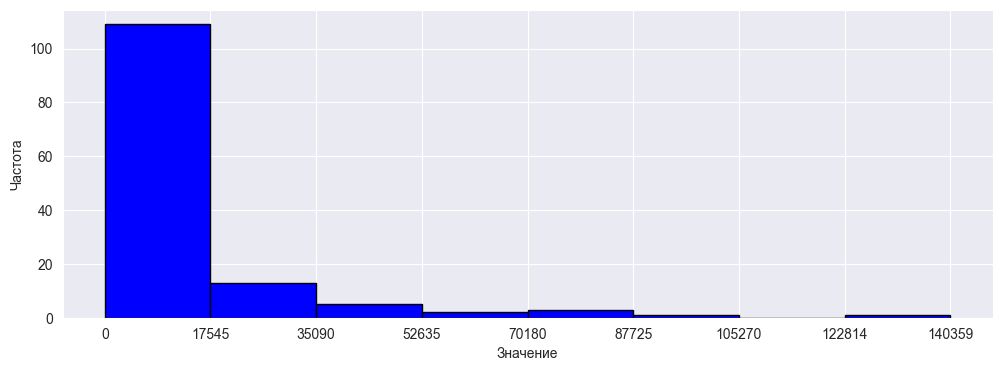

In [28]:
plt.figure(figsize=(12, 4))
plt.hist(var5['Вариационный ряд'], bins=num_bins, color='b', edgecolor='k')
plt.xlabel('Значение')
plt.ylabel('Частота')
bin_edges = np.linspace(var5_info['min'], var5_info['max'], num_bins + 1)
plt.xticks(bin_edges)
plt.show()

5.4. Ящик с усами

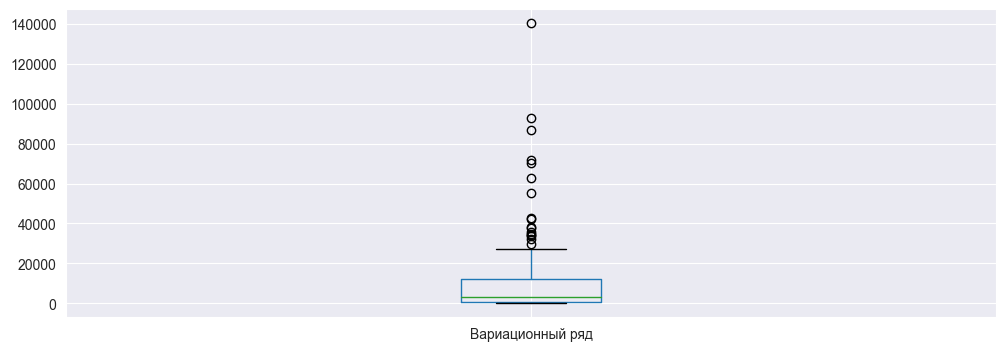

In [29]:
plt.figure(figsize=(12, 4))
var5.boxplot(column='Вариационный ряд')
plt.show()

5.5. Выдвижение гипотезы о распределении переменной

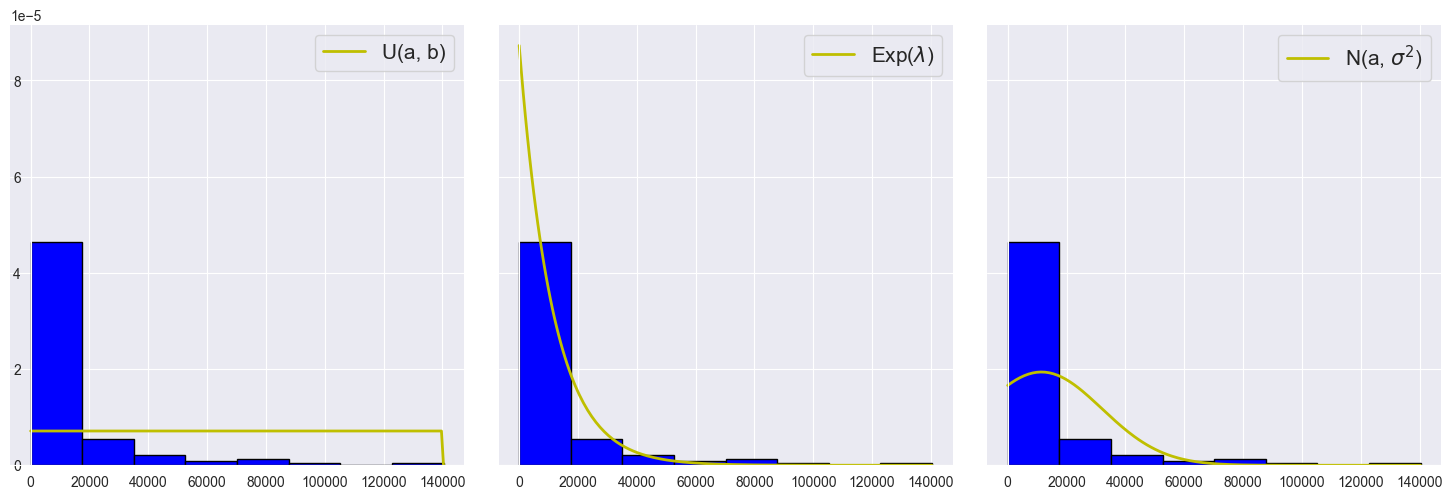

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
fig.tight_layout()
for i in range(3):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_position('zero')
    ax[i].spines['bottom'].set_position('zero')

l5 = var5['Вариационный ряд']
x = np.linspace(min(l5), max(l5) + 1, num=200)
y0 = stats.uniform.pdf(x, loc=min(l5), scale=max(l5)-min(l5))
y1 = stats.expon.pdf(x, loc=min(l5), scale=var5_info['mean'])
y2 = stats.norm.pdf(x, loc=var5_info['mean'], scale=var5_info['std'])


ax[0].hist(var5['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[0].plot(x, y0, linewidth=2, color='y', label='U(a, b)')
ax[0].legend(fontsize=15)

ax[1].hist(var5['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[1].plot(x, y1, linewidth=2, color='y', label=r'Exp($\lambda$)')
ax[1].legend(fontsize=15)

ax[2].hist(var5['Вариационный ряд'], bins=num_bins, density=True, color='b', edgecolor='k')
ax[2].plot(x, y2, linewidth=2, color='y', label=r'N(a, $\sigma^2$)')
ax[2].legend(fontsize=15)

plt.show()

Можно сделать предположение, что переменная имеет экспоненциальное распределение.

<Axes: >

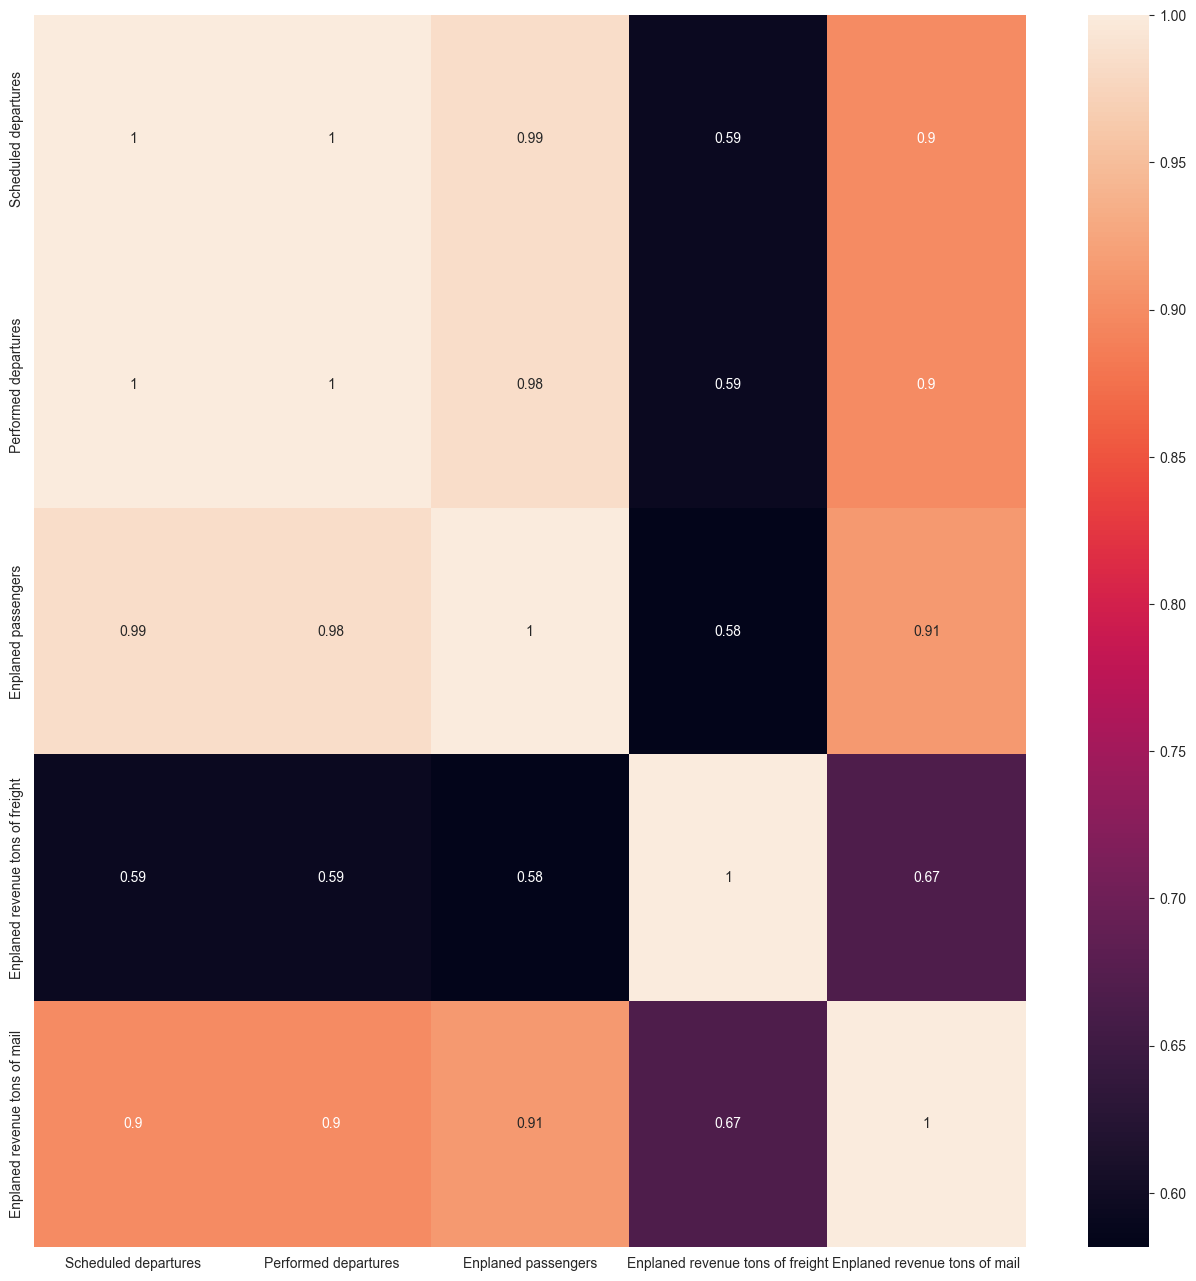

In [31]:
import seaborn as sns
plt.figure(figsize=(16,16))
mat = df[['Scheduled departures', 'Performed departures', 'Enplaned passengers', 'Enplaned revenue tons of freight', 'Enplaned revenue tons of mail']].corr()
sns.heatmap(mat, annot=True)